<a href="https://colab.research.google.com/github/megan4621/Math254_final_project/blob/main/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [4]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based pn servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


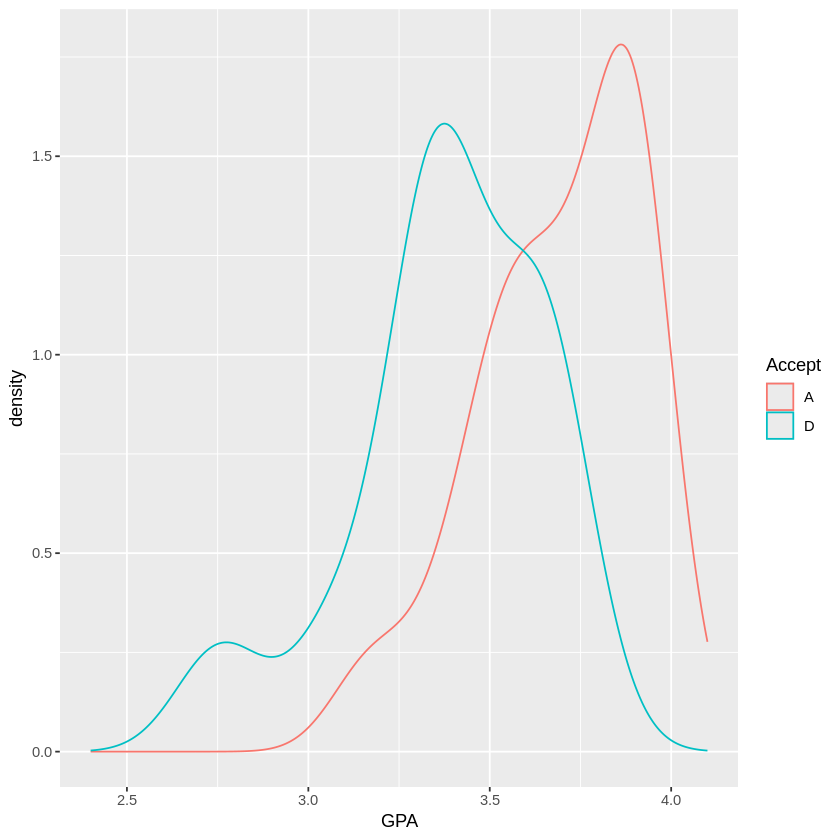

In [5]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





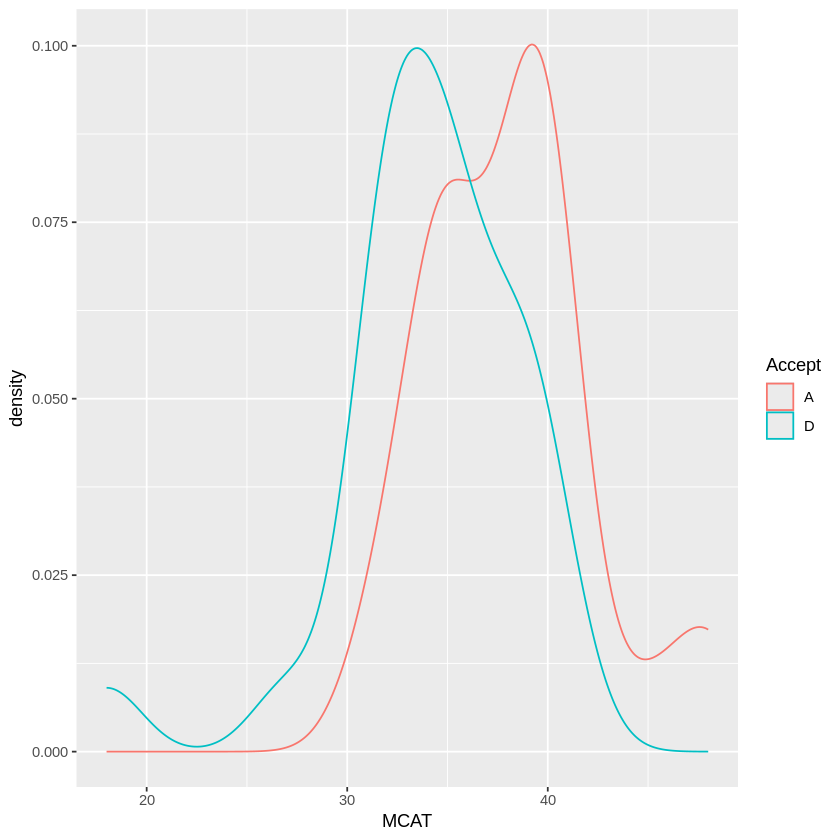

In [6]:
mydata %>%
  ggplot () +
  aes (x = MCAT, col = Accept) +
  geom_density ()

In [8]:
acceptance_rates <- mydata %>%
  group_by(Accept) %>%
  summarize(mean_mcat = mean(MCAT))
print(acceptance_rates)

Accept,mean_mcat
<fct>,<dbl>
A,38.06667
D,34.12000


Here, we see from the density graph and the mean MCAT scores for the accepted and denied group that the accepted group had a higher MCAT score on average. This makes sense, as those scoring higher on important med school skills would be more appealing to the admissions boards.

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



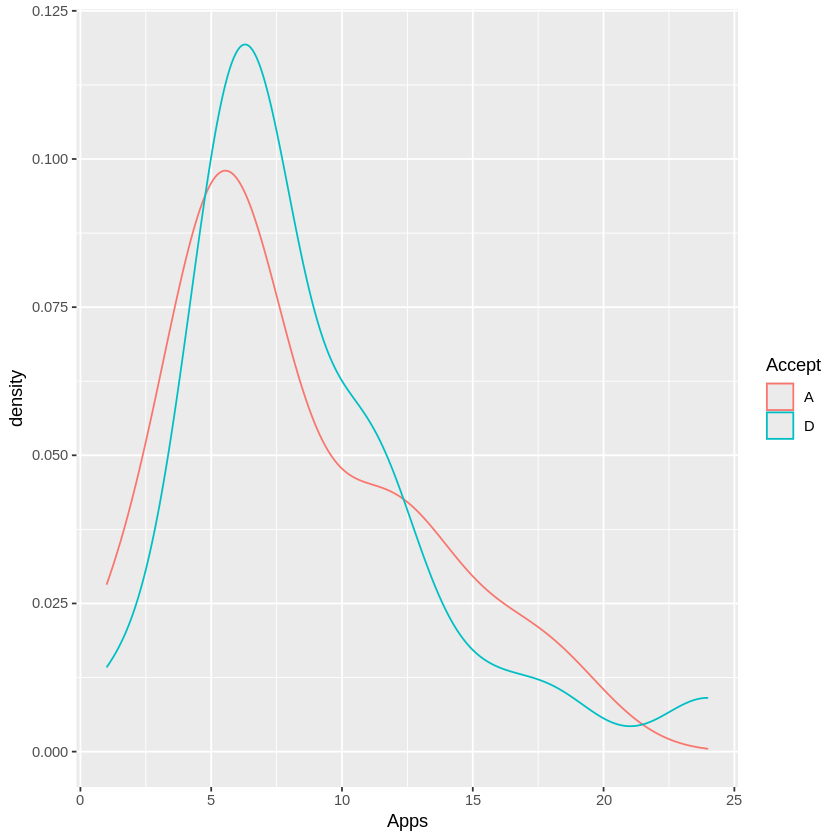

In [10]:
mydata %>%
  ggplot () +
  aes (x = Apps, col = Accept) +
  geom_density ()

This density graph shows us that the number of applications doesn't really affect whether someone gets accepted or denied. The high level of overlap means that they are not very differentiated by this variable.

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


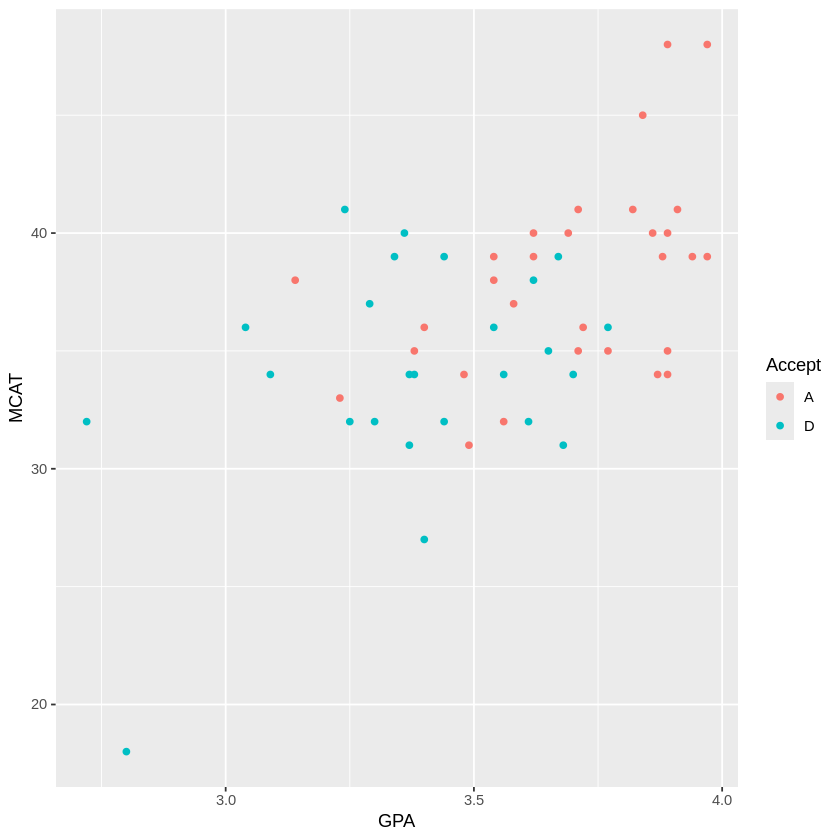

In [12]:
mydata %>%
  ggplot () +
  aes (x = GPA, y = MCAT, col = Accept) +
  geom_point ()


In [18]:
mydata %>%
  summarize(cor(GPA, MCAT))

"cor(GPA, MCAT)"
<dbl>
0.5414202


There does appear to be a positive correlation between GPA and MCAT values.



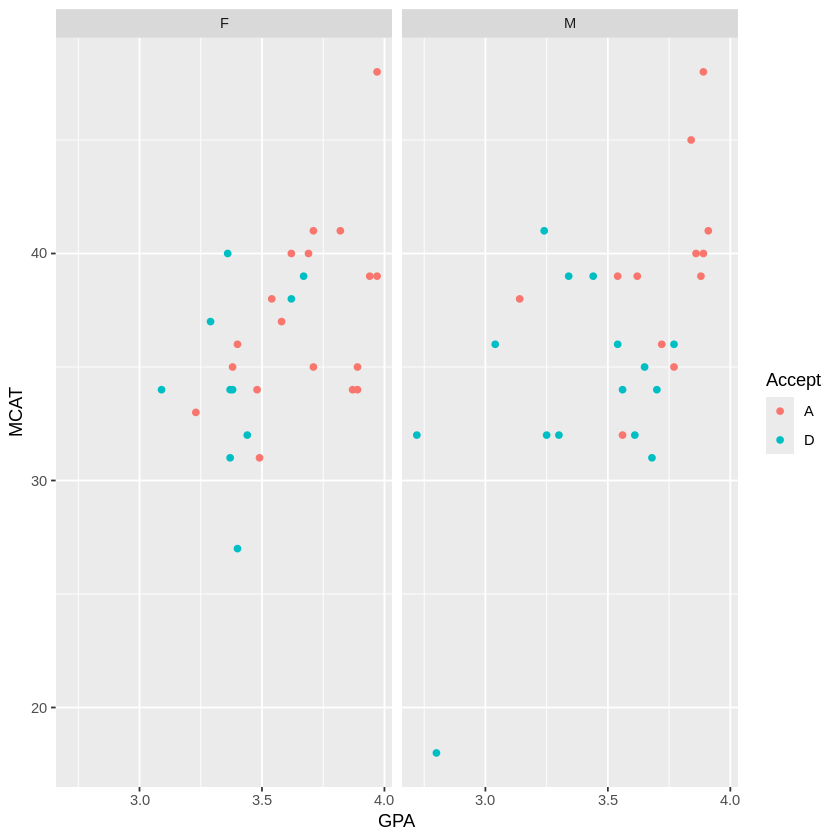

In [16]:
mydata %>%
  ggplot () +
  aes (x = GPA, y = MCAT, col = Accept) +
  geom_point () +
  facet_wrap (~Sex)

In [13]:
correlations <- mydata %>%
  group_by (Sex) %>%
  summarize(correlation = cor(GPA, MCAT, use = "complete.obs"))
correlations

Sex,correlation
<fct>,<dbl>
F,0.5097200
M,0.5624715


While the females appear to have a stronger correlation based on the picture, they have a lower correlation coefficient. This is likely due to an outlier in the males in a positive-adding quadrant. If removed, we see a more expected correlation.

In [17]:
mydata %>%
  filter(MCAT > 20) %>%
  group_by (Sex) %>%
  summarize (cor(GPA, MCAT))

Sex,"cor(GPA, MCAT)"
<fct>,<dbl>
F,0.5097200
M,0.4008728


Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


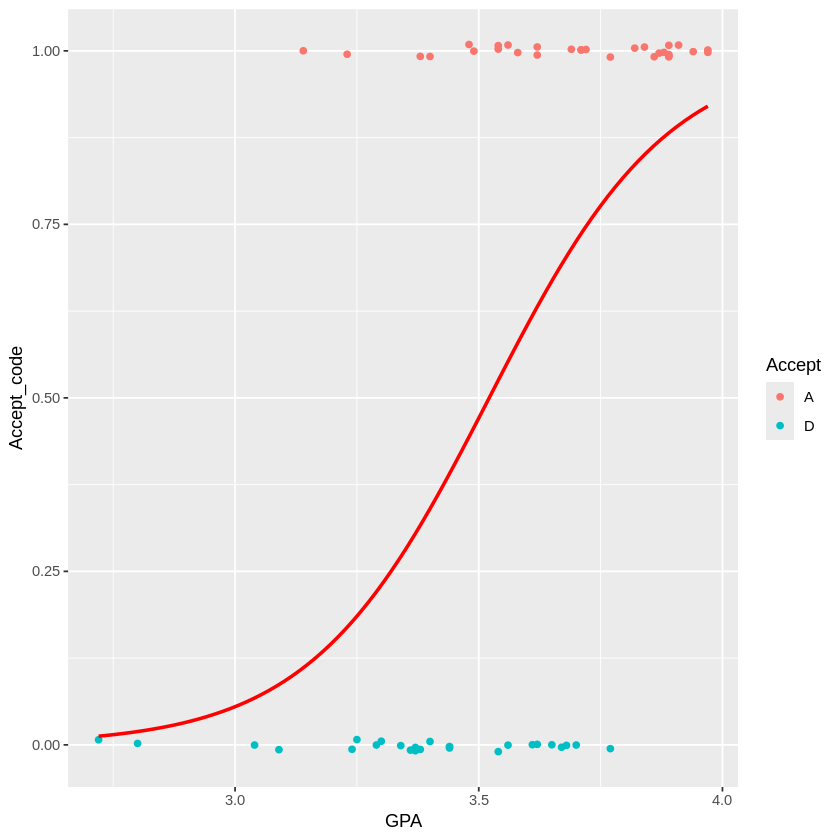

In [ ]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

`geom_smooth()` using formula = 'y ~ x'


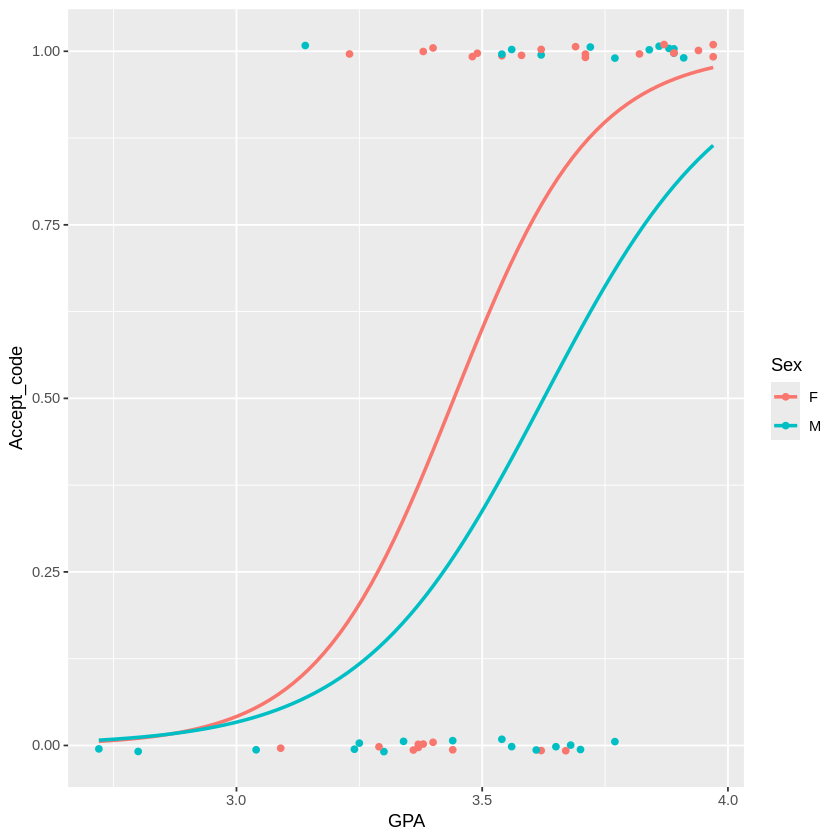

In [20]:
mydata %>%
  ggplot() +
  aes(x = GPA, y = Accept_code, color = Sex) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(
    method = 'glm',
    method.args = list(family = 'binomial'),
    se = FALSE,
    fullrange = TRUE
  ) +
  labs(color = "Sex")

Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [23]:
mymodel <- glm(Accept_code ~ GPA + Sex, family = "binomial", data = mydata)
summary(mymodel)


Call:
glm(formula = Accept_code ~ GPA + Sex, family = "binomial", data = mydata)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -21.0680     6.4025  -3.291 0.001000 ***
GPA           6.1324     1.8283   3.354 0.000796 ***
SexM         -1.1697     0.7178  -1.629 0.103210    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 53.945  on 52  degrees of freedom
AIC: 59.945

Number of Fisher Scoring iterations: 5


In [24]:
mymodel2 <- glm(Accept_code ~ GPA + Sex + GPA*Sex, family = "binomial", data = mydata)
summary(mymodel2)


Call:
glm(formula = Accept_code ~ GPA + Sex + GPA * Sex, family = "binomial", 
    data = mydata)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -24.385     10.082  -2.419   0.0156 *
GPA            7.083      2.891   2.450   0.0143 *
SexM           4.901     13.156   0.373   0.7095  
GPA:SexM      -1.709      3.709  -0.461   0.6450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 53.729  on 51  degrees of freedom
AIC: 61.729

Number of Fisher Scoring iterations: 5


Since adding the interaction value of GPA*Sex does not decrease the sum of squared errors by a large amount, I will use mymodel for simplicity.

Q9: Write down equations of the two fitted logistic curves.

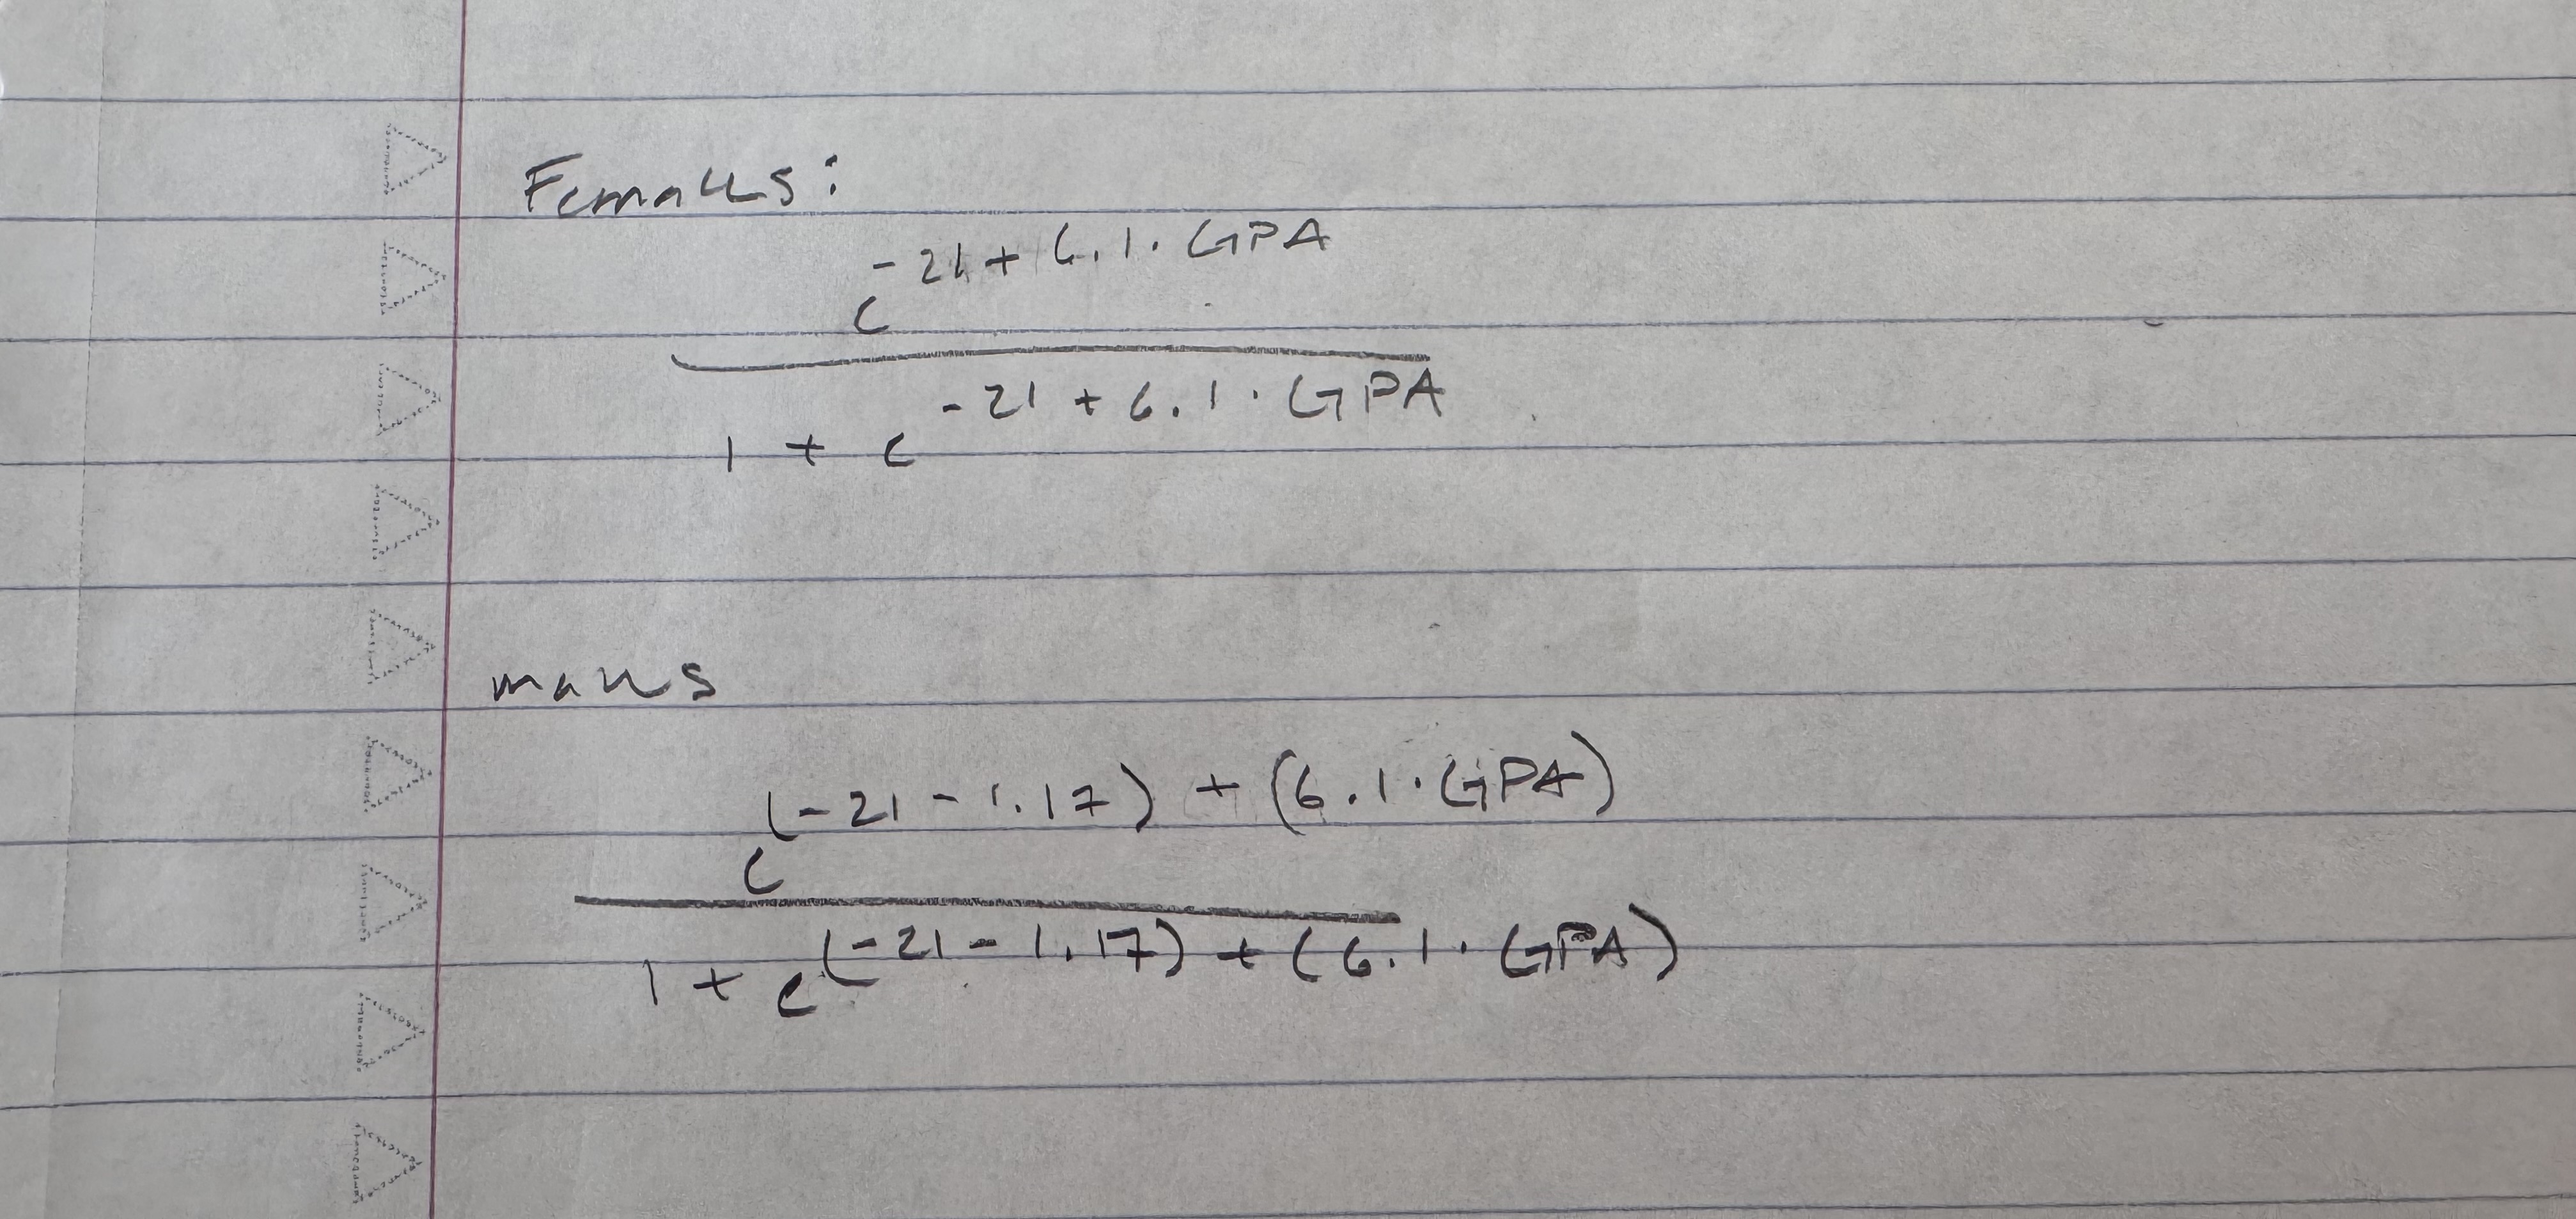

Q10: What is the $R^2$ of your model?  Do you see one in your model output?

The $R^2$ for logistical models follows the same priciples of the linear model. Null devience is the metric for the total error in your simplest model while the residual devience is the metric for your proposed model. So here, we see a nice reduction in the residual devience, telling us that our model has improved on the simplest model.

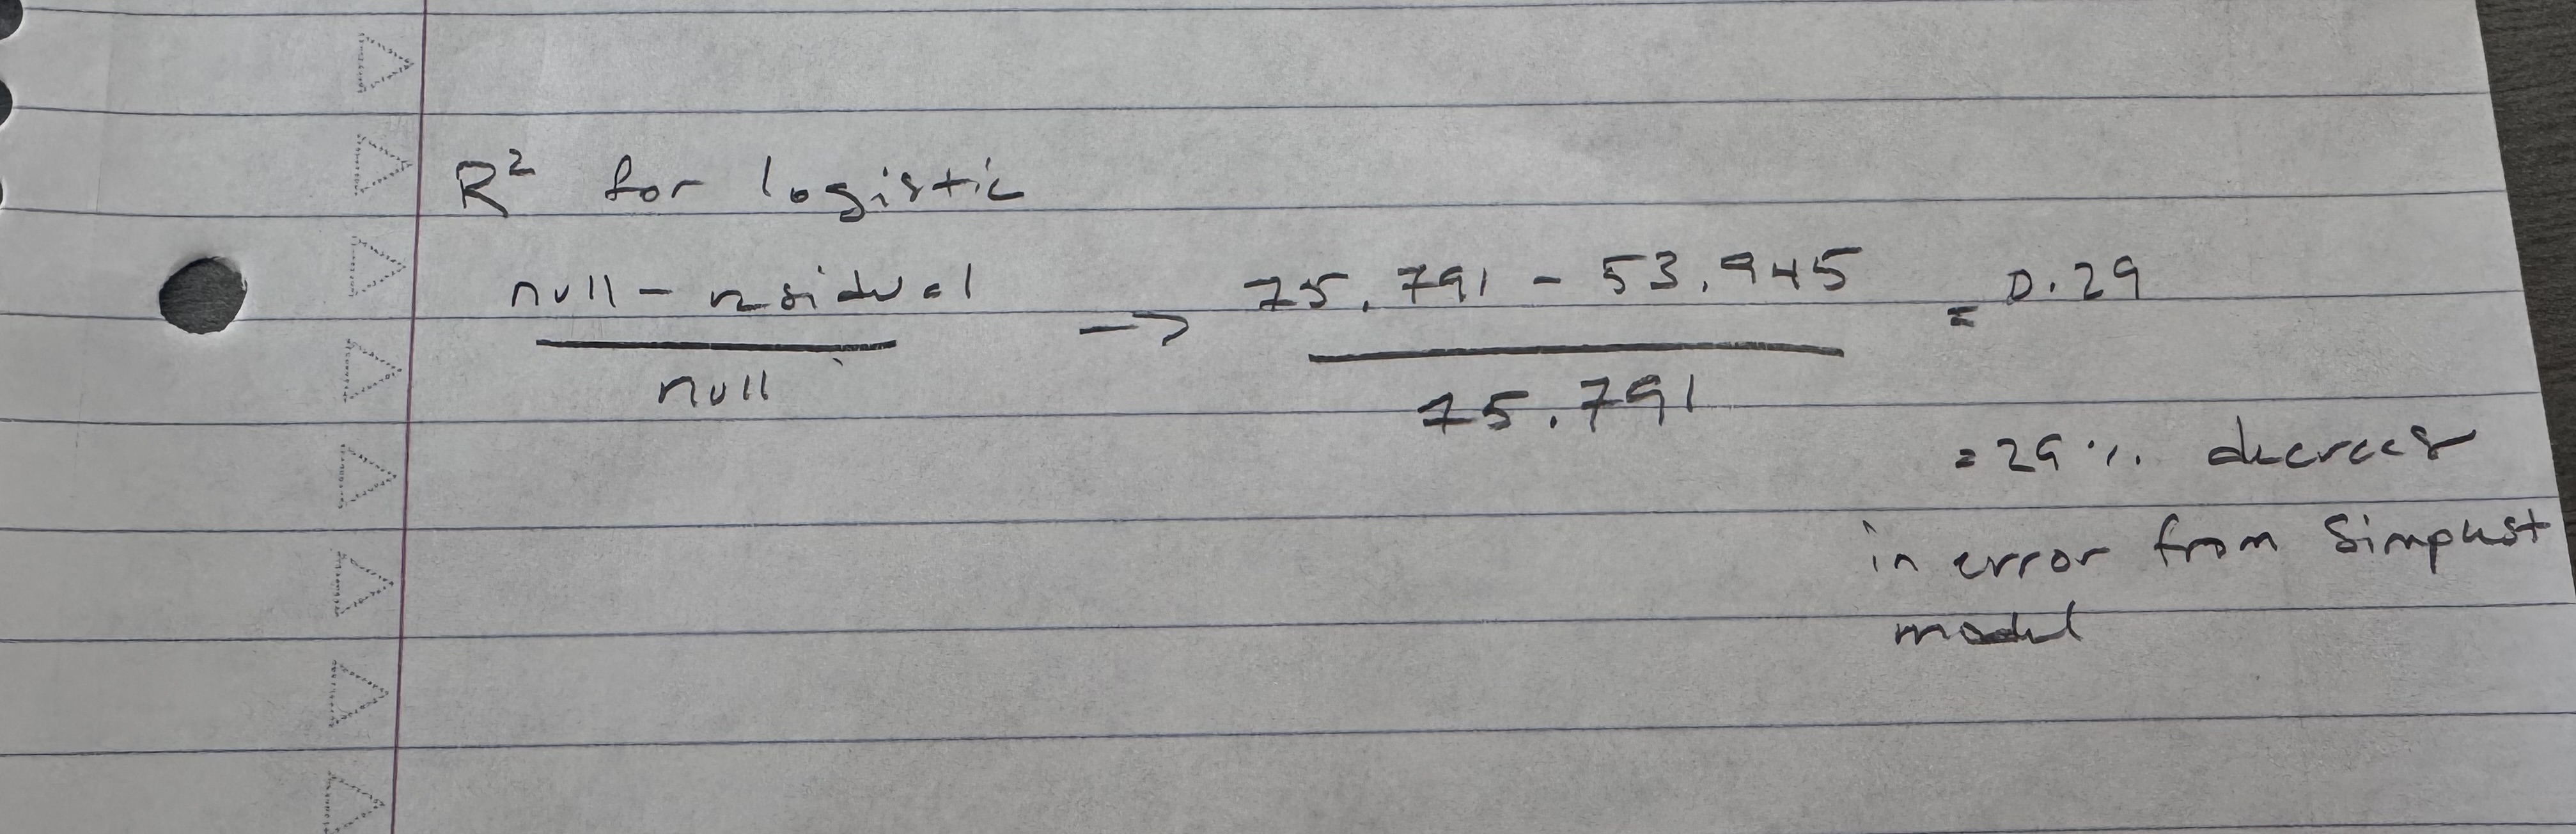